# Step1 Getting familiar with the muon objects and nanoaod
In this exercise we will get familiar with the muon objects in an [nanoAOD](https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookNanoAOD) file. We will mostly use the following file, containing simulated Drell–Yan dimuon events generated at NLO.<br>
* DYJetsToMuMu_M-50_TuneCP5_13TeV-madgraphMLM-pythia8.root

Further information and a list of those variables stored in nanoAOD can be found [here](https://cms-nanoaod-integration.web.cern.ch/integration/master-106X/mc102X_doc.html).<br>
In nanoAOD, data are stored as arrays. 
[Uproot](https://github.com/scikit-hep/uproot#exploring-a-file) will be used to explore the nanoAOD file.


Not importing? Don't forget to select the correct kernel

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from math import pi

First, lets take a look of the variables stored in NanoAOD. Uproot.open( ) return a ROOTDirectory similar to a python dictionary. Function key( ) prints all the dicinory keywords. The b' ahead of the names is due to ROOT object names having no encoding.

In [2]:
#events=uproot.open('/eos/purdue/store/mc/Run3Summer22NanoAODv13/DYJetsToLL_M-50_TuneCP5_13p6TeV-madgraphMLM-pythia8/NANOAODSIM/133X_mcRun3_2022_realistic_ForNanov13_v1-v1/50000/1c16ff7d-a4ad-44cd-80fd-42840958ce79.root')['Events']
events=uproot.open('~/work/projects/hats2024/data/DYtoMuMu.root')['Events']

In [3]:
events.keys()
#events.values()
#events.show()

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'HTXS_njets25',
 'HTXS_njets30',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'BeamSpot_type',
 'BeamSpot_sigmaZ',
 'BeamSpot_sigmaZError',
 'BeamSpot_z',
 'BeamSpot_zError',
 'nboostedTau',
 'boostedTau_idAntiEle2018',
 'boostedTau_idAntiMu',
 'boostedTau_idMVAnewDM2017v2',
 'boostedTau_idMVAoldDM2017v2',
 'boostedTau_jetIdx',
 'boostedTau_rawAntiEleCat2018',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boost

**Question 1**: Which collections contain muons or muon candidates? (At any level: generated, reconstructed, trigger, etc.)

**Answer 1:**
Muon, Trigobj, GenPart

# Step2 Print and plot some muon objects 
We can print different objects such as transeverse momentum($p_T$ pt), pseudorapidity(eta $\eta$) and azimuthal angle(phi $\phi$) and apply cut on $p_T$, $\eta$ and $\phi$ using uproot.<br>
First lets print pt eta phi of reconstructed muon 

In [4]:
muon_pt,muon_eta,muon_phi,nmuon,ngenpart=events.arrays(["Muon_pt", "Muon_eta", "Muon_phi", "nMuon", "nGenPart"],library="ak",how=tuple)

In [5]:
print('muon_pt=', muon_pt, '\n',
      'muon_eta=', muon_eta, '\n',
      'muon_phi=', muon_phi)


muon_pt= [[], [], [14.2], [41.4, 37.2], ..., [33.7, ...], [26.8, 24.4], [], [41.6, 32.2]] 
 muon_eta= [[], [], [-0.359], [1.06, ...], ..., [-0.719, 0.676], [], [0.722, -0.701]] 
 muon_phi= [[], [], [-3], [2.61, -0.37], ..., [...], [0.317, -2.96], [], [-0.0455, -3.06]]


Lets plot them using matplotlib

Text(0, 0.5, 'Events')

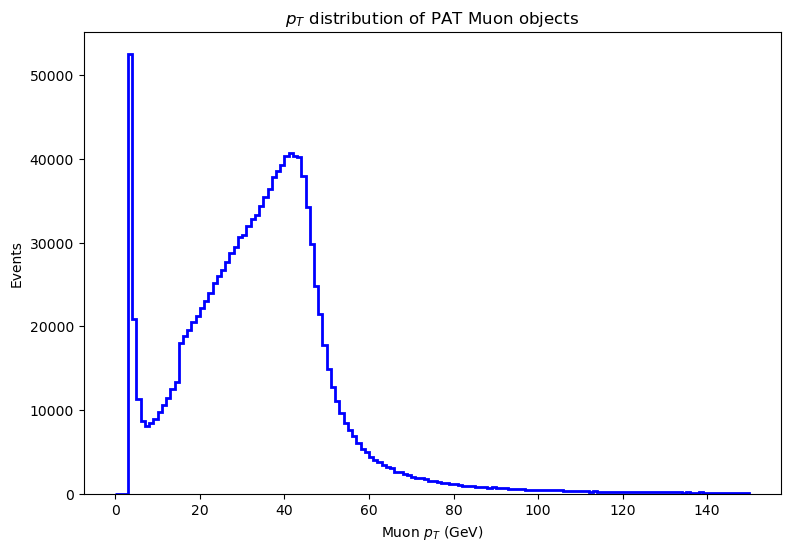

In [6]:
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(muon_pt), bins=150, range=[0,150], histtype='step',linewidth=2, color='blue', label='$p_T$ distribution of all Muons')
plt.title('$p_T$ distribution of PAT Muon objects')
plt.xlabel(r'Muon $p_T$ (GeV)')
plt.ylabel('Events')

<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_8174/442157781.py:2: SyntaxWarning: invalid escape sequence '\e'
  plt.hist(ak.flatten(muon_eta), bins=60, range=[-3, 3], histtype='step',linewidth=2, color='red', label='muon_$\eta$')
/tmp/ipykernel_8174/442157781.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.title('$\eta$ distribution of PAT Muon objects')


Text(0, 0.5, 'Events')

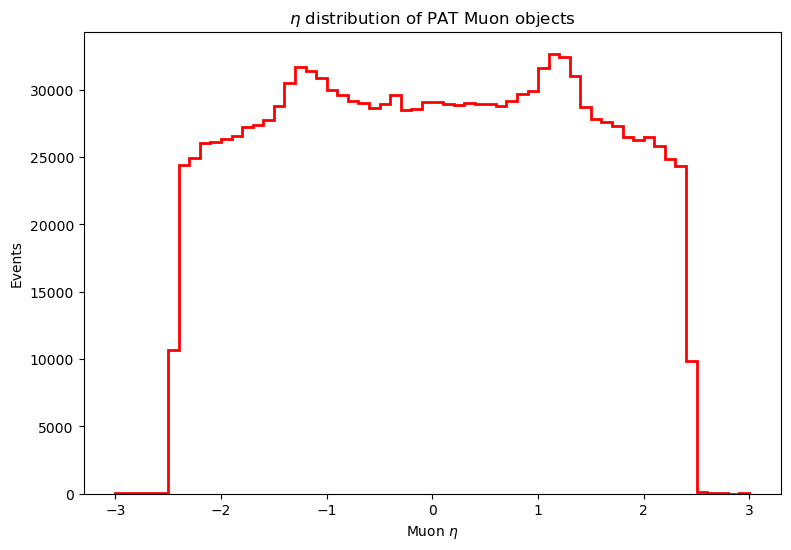

In [7]:
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(muon_eta), bins=60, range=[-3, 3], histtype='step',linewidth=2, color='red', label='muon_$\eta$')
plt.title('$\eta$ distribution of PAT Muon objects')
plt.xlabel(r'Muon $\eta$')
plt.ylabel('Events')

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_8174/3680516053.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.hist(ak.flatten(muon_phi), bins=70, range=[-3.5, 3.5], histtype='step',linewidth=2, color='green', label='muon_$\phi$')
/tmp/ipykernel_8174/3680516053.py:3: SyntaxWarning: invalid escape sequence '\p'
  plt.title('$\phi$ distribution of PAT Muon objects')


Text(0, 0.5, 'Events')

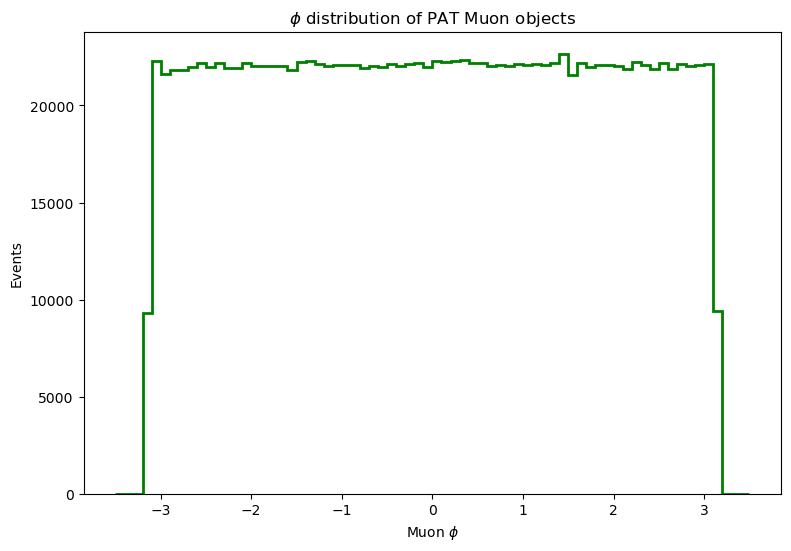

In [8]:
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(muon_phi), bins=70, range=[-3.5, 3.5], histtype='step',linewidth=2, color='green', label='muon_$\phi$')
plt.title('$\phi$ distribution of PAT Muon objects')
plt.xlabel(r'Muon $\phi$')
plt.ylabel('Events')

Then lets apply criteria such as pt>20 GeV and |eta|<2.4.

In [9]:
masking=(muon_pt>20)&(abs(muon_eta)<2.4)
masking

<Array [[], [], [False], ..., [], [True, True]] type='930236 * var * bool'>

As you can see above, by performing masking, a jagged array of bool values is created.
Then using the sytax array[masking], we keep only the varible that is true in the masking array

In [10]:
print('muon_pt=', muon_pt[masking], '\n',
      'muon_eta=', muon_eta[masking], '\n',
      'muon_phi=', muon_phi[masking])

muon_pt= [[], [], [], [41.4, 37.2], ..., [33.7, ...], [26.8, 24.4], [], [41.6, 32.2]] 
 muon_eta= [[], [], [], [1.06, -0.0674], ..., [...], [-0.719, 0.676], [], [0.722, -0.701]] 
 muon_phi= [[], [], [], [2.61, -0.37], ..., [...], [0.317, -2.96], [], [-0.0455, -3.06]]


Then lets plot pt of reconstructed muon and reconstructed muon with pt>20 GeV and |eta|<2.4, note that we can use flatten() to reduce the jagged 2 dimension array to 1 dimension.

In [11]:
muon_pt_masked=muon_pt[masking]
muon_pt_flat=ak.flatten(muon_pt)
muon_pt_masked_flat=ak.flatten(muon_pt_masked)

Text(0, 0.5, 'Events')

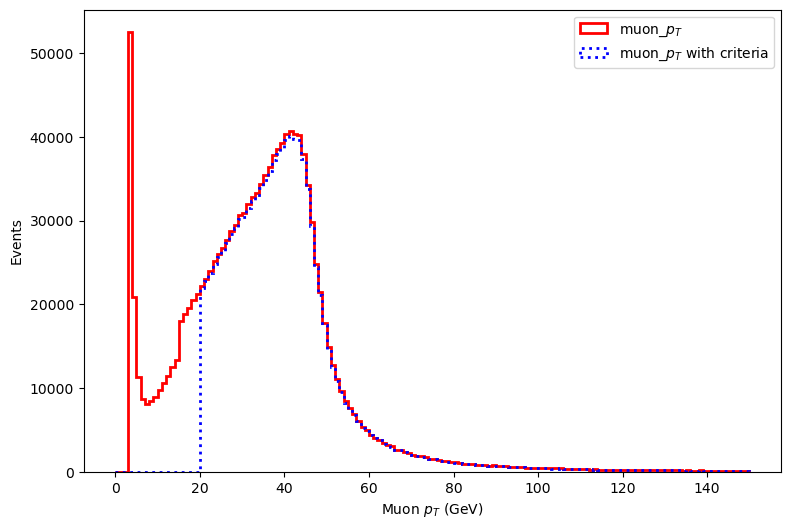

In [12]:
plt.figure(figsize=(9,6))
plt.hist(muon_pt_flat, bins=150, range=[0,150], histtype='step',linewidth=2, color='red', label='muon_$p_T$')
plt.hist(muon_pt_masked_flat, bins=150, range=[0,150], histtype='step',linewidth=2, linestyle=':', color='blue', label='muon_$p_T$ with criteria')
plt.legend()
plt.xlabel(r'Muon $p_T$ (GeV)')
plt.ylabel('Events')

**Question 2**: Using the syntax above, plot the main kinematic observables for the following objects and selections (only the first few events):
* all final-state muons in the GenPart collection
* all final-state muons in the GenPart collection with pT > 20 GeV and |η| < 2.4
* all final-state muons in the GenPart collection with pT > 20 GeV and |η| < 2.4, and not coming from a hadron or τ decay

**Question 3**: Compare the numbers of reconstructed and generated muons and their pT spectra at different selection stages, by overlaying the distributions in the same frame.<br>
Since you are running on a Drell–Yan sample, you would expect two muons per event. Explain why there are sometimes more than two muons in an event.<br>
Look at the full distributions, without η and pT cuts. Can you explain the differences?<br>

Hint (GenPart_statusFlags: gen status flags stored bitwise. Bits are: 0 : isPrompt, 1 : isDecayedLeptonHadron, 2 : isTauDecayProduct, 3 : isPromptTauDecayProduct, 4 : isDirectTauDecayProduct, 5 : isDirectPromptTauDecayProduct, 6 : isDirectHadronDecayProduct, 7 : isHardProcess, 8 : fromHardProcess, 9 : isHardProcessTauDecayProduct, 10 : isDirectHardProcessTauDecayProduct, 11 : fromHardProcessBeforeFSR, 12 : isFirstCopy, 13 : isLastCopy, 14 : isLastCopyBeforeFSR,

GenPart_status	Particle status. 1=stable)

<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_8174/1454705003.py:7: SyntaxWarning: invalid escape sequence '\e'
  plt.hist(ak.flatten(genpart_pt[masking_two]), bins=150, range=[0,150], histtype='step',linewidth=2, color='blue', label='Final state Muons with $p_T$ > 20GeV and $|\eta|$<2.4')
/tmp/ipykernel_8174/1454705003.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.hist(ak.flatten(genpart_pt[masking_three]), bins=150, range=[0,150], histtype='step',linewidth=2, color='brown', linestyle=('dashed'), label='Final state Muons with $p_T$ > 20GeV and $|\eta|$<2.4\nand not coming from hadron or $\\tau$ decay')


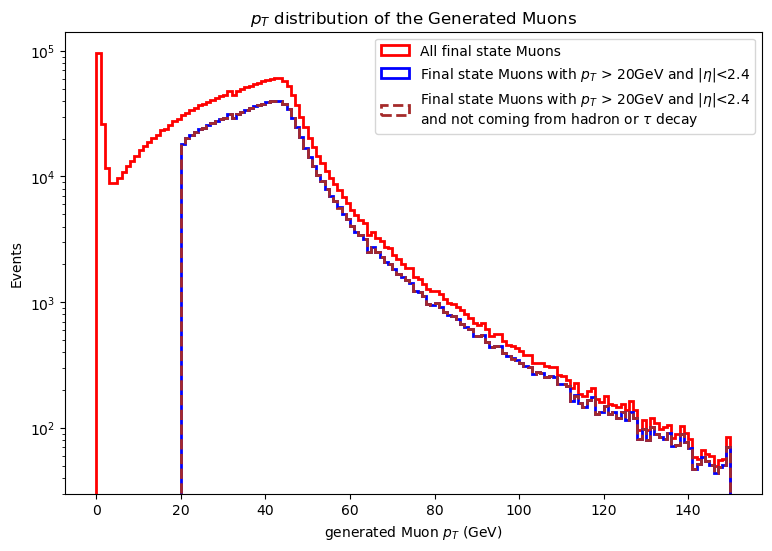

In [13]:
genpart_status, genpart_statusflags, genpart_pdgid, genpart_pt, genpart_eta, genpart_phi=events.arrays(["GenPart_status", "GenPart_statusFlags", "GenPart_pdgId", "GenPart_pt", "GenPart_eta", "GenPart_phi"], library='ak', how=tuple)
masking_one=(abs(genpart_pdgid)==13)& (genpart_status==1)
masking_two=(abs(genpart_pdgid)==13)& (genpart_status==1)&(genpart_pt>20)&(abs(genpart_eta)<2.4)
masking_three=(abs(genpart_pdgid)==13)& (genpart_status==1)&(genpart_pt>20)&(abs(genpart_eta)<2.4)&((genpart_statusflags%2)==1)
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(genpart_pt[masking_one]), bins=150, range=[0,150], histtype='step',linewidth=2, color='red', label='All final state Muons')
plt.hist(ak.flatten(genpart_pt[masking_two]), bins=150, range=[0,150], histtype='step',linewidth=2, color='blue', label='Final state Muons with $p_T$ > 20GeV and $|\eta|$<2.4')
plt.hist(ak.flatten(genpart_pt[masking_three]), bins=150, range=[0,150], histtype='step',linewidth=2, color='brown', linestyle=('dashed'), label='Final state Muons with $p_T$ > 20GeV and $|\eta|$<2.4\nand not coming from hadron or $\\tau$ decay')
plt.legend()
plt.title('$p_T$ distribution of the Generated Muons')
plt.xlabel(r'generated Muon $p_T$ (GeV)')
plt.ylabel('Events')
plt. yscale('log')

Lets also compare the number of muons in each event between reconstructed one and generated one

Text(0, 0.5, 'Events')

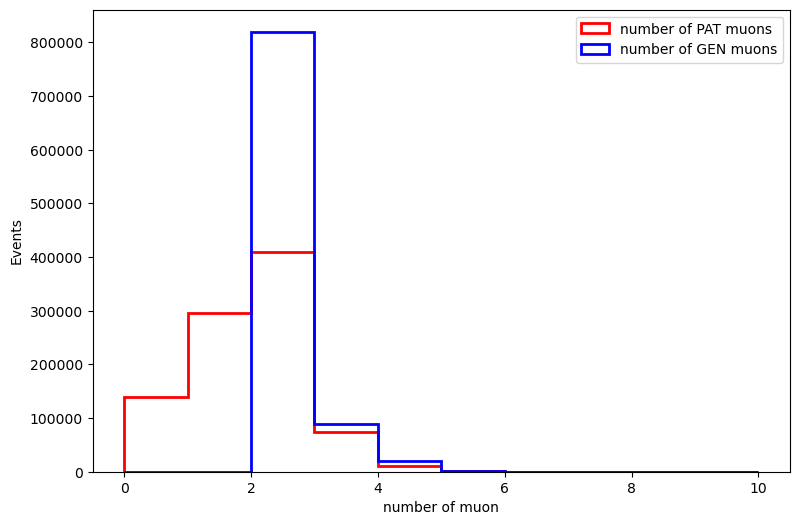

In [14]:
plt.figure(figsize=(9,6))
plt.hist(nmuon, bins=10, range=[0,10], histtype='step',linewidth=2, color='red', label='number of PAT muons')
plt.hist(ak.count(genpart_pt[masking_one], axis=1), bins=10, range=[0,10], histtype='step',linewidth=2, color='blue', label='number of GEN muons')
plt.legend()
plt.xlabel('number of muon')
plt.ylabel('Events')

Text(0, 0.5, 'Events')

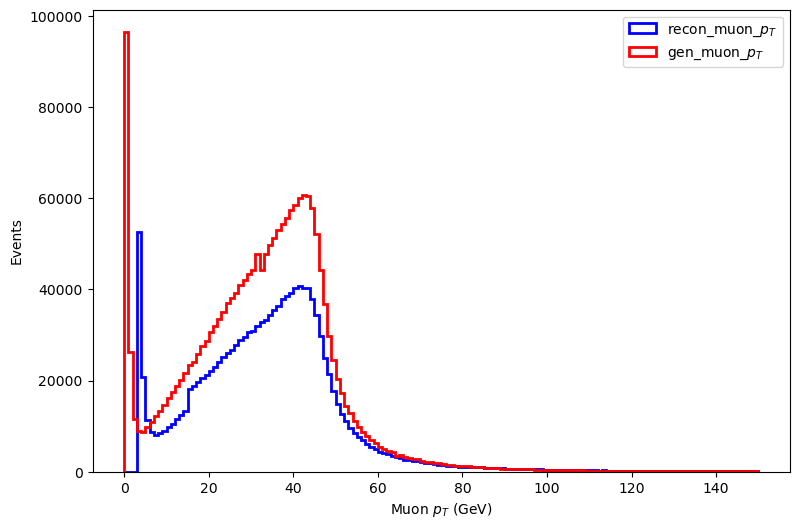

In [15]:
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(muon_pt), bins=150, range=[0,150], histtype='step',linewidth=2, color='blue', label='recon_muon_$p_T$')
plt.hist(ak.flatten(genpart_pt[masking_one]), bins=150, range=[0,150], histtype='step',linewidth=2, color='red', label='gen_muon_$p_T$')
plt.legend()
plt.xlabel(r'Muon $p_T$ (GeV)')
plt.ylabel('Events')

**Answers 3:**

- Other than the muons from the DY process, there are muons produced in the “underlying event” or in pileup vertices (mostly from hadron decays)
- In the higher pT region (20–60 GeV, muons from Z decays), there are more GEN muons than PAT muons, because the GenParticle collection includes muons outside the detector acceptance (|η| > 2.4), which are not reconstructed.
- In the very low-pT region (< 10 GeV) there are more reconstructed muons than generated ones. Fake muons and muons from light-hadron decays, which are generally low pT, are not included in the GenParticle collection

# Step 3 Gen matching
When working with simulated data, it is sometime useful to pair each reconstructed muon to its corresponding generated particle, e.g. for efficiency or resolution studies. In this part of the exercise we will learn possible ways to do this.<br>

Gen matching information for muon is already stored in Muon_genPartIdx, which is matched on status=1 muon using particle flow algorithm. 
Lets print the Moun_genPartIdx. Note that -1 means cannot matched to generated particles.

In [16]:
muon_genpartidx=events["Muon_genPartIdx"].array()
muon_genpartidx

<Array [[], [], [6], ..., [9, 8], [], [7, 8]] type='930236 * var * int16'>

We can also do a matching ourselves using deltaR method, in deltaR method, we need to make sure the delta phi is between pi and -pi. Below defines a deltaR function
&Delta;R = (&Delta;&eta;<sup>2</sup> + &Delta;&phi;<sup>2</sup>)<sup>1/2</sup> <br>
Note that &Delta;&phi; is between &pi; to -&pi;.

In [17]:
def deltaR(genetas, eta, genphis, phi):
    return np.sqrt((genetas-eta)**2+((genphis-phi+pi)%(2*pi)-pi)**2)

In [ ]:
muon_genpartidx_deltar=[]

for genetas, genphis, etas, phis in zip(genpart_eta, genpart_phi, muon_eta, muon_phi):
  idx=[]
  for eta, phi in zip(etas, phis):
    deltar=deltaR(genetas, eta, genphis, phi)
    if ak.min(deltar)<0.3:
        idx.append(ak.argmin(deltar))
    else:
        idx.append(-1)
  muon_genpartidx_deltar.append(idx)

#print(muon_genpartidx_deltar)
#for geneta, genphi, in zip

**Question 5**: Are there reconstructed muons that do not match any generated muons? Why? 

**Answer 5:**
- Yes, mostly at low pT or high |η|, where most of the fake muons or muons from
underlying event are. Such fakes do not have a corresponding generated muon

**Question 6**: Are there cases in which the &Delta;R matching fails to find the correct generated particle? Why? 

**Answer 6:**
- There are few cases. A geometrical matching (closest generated muon in ΔR) can fail
when there are multiple muons close to each other (e.g. a well reconstructed muon and
a few duplicates around it, reconstructed using the wrong track)

Lets take a look at those reconstracted muons that do not match any generated muons, and plot their pt and eta distribution

In [ ]:
masking_nogenmatch=(muon_genpartidx==-1)
masking_genmatched=(muon_genpartidx!=-1)

In [ ]:
print(masking_nogenmatch)
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(muon_pt[masking_nogenmatch]), bins=150, range=[0,150], histtype='step',linewidth=2, color='blue', label='unmatched PAT muon $p_T$')
plt.hist(ak.flatten(muon_pt[masking_genmatched]), bins=150, range=[0,150], histtype='step',linewidth=2, color='red', label='matched PAT muon $p_T$')
plt.legend()
plt.xlabel(r'PAT Muon $p_T$ (GeV)')
plt.ylabel('Events')

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(muon_eta[masking_nogenmatch]), bins=60, range=[-3,3], histtype='step',linewidth=2, color='blue', label='unmatched PAT muon $\eta$')
plt.hist(ak.flatten(muon_eta[masking_genmatched]), bins=60, range=[-3,3], histtype='step',linewidth=2, color='red', label='matched PAT muon $\eta$')
plt.legend()
plt.xlabel(r'PAT Muon $\eta$')
plt.ylabel('Events')

# Step 4: Trigger matching

A physics analysis often requires a matching between trigger and offline objects for a proper assessment of trigger efficiencies and related systematics. In order to reduce size per event. NanoAODThe no longer store matching information between muon objects and trigger objects. 
TrigObj_id in nanoAOD stored the ID of the HLT object. Using previous recipe, we can perform a simple $\Delta R$ matching between HLT and reconstructed objects.

In [ ]:
hlt_pt, hlt_eta, hlt_phi, hlt_id= events.arrays(["TrigObj_pt", "TrigObj_eta", "TrigObj_phi", "TrigObj_id"], library='ak', how=tuple)

In [ ]:
hltmuon_mask=abs(hlt_id)==13

In [ ]:
hltmuon_genpartidx_deltar=[]

for genetas, genphis, etas, phis in zip(genpart_eta, genpart_phi, hlt_eta[hltmuon_mask], hlt_phi[hltmuon_mask]):
  idx=[]
  for eta, phi in zip(etas, phis):
    deltar=deltaR(genetas, eta, genphis, phi)
    if ak.min(deltar)<0.1:
        idx.append(ak.argmin(deltar))
    else:
        idx.append(-1)
  hltmuon_genpartidx_deltar.append(idx)


In [ ]:
hltmuon_genpartidx_deltar=ak.from_iter(hltmuon_genpartidx_deltar)
hltmasking_nogenmatch=(hltmuon_genpartidx_deltar==-1)
hltmasking_genmatched=(hltmuon_genpartidx_deltar!=-1)

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(hlt_pt[hltmuon_mask]), bins=150, range=[0,150], histtype='step', linewidth=2, color='green', label='HLT muon $p_T$')
plt.hist(ak.flatten(hlt_pt[hltmuon_mask][hltmasking_nogenmatch]), bins=150, range=[0,150], histtype='step',linewidth=2, color='blue', label='unmatched HLT muon $p_T$')
plt.hist(ak.flatten(hlt_pt[hltmuon_mask][hltmasking_genmatched]), bins=150, range=[0,150], histtype='step',linewidth=2, color='red', linestyle=(':'), label='matched HLT muon $p_T$')

plt.legend()
plt.xlabel(r'Muon $p_T$ (GeV)')
plt.ylabel('Events')
plt.yscale('log')

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(ak.flatten(hlt_eta[hltmuon_mask][hltmasking_nogenmatch]), bins=60, range=[-3,3], histtype='step',linewidth=2, color='blue', label='unmatched HLT muon $\eta$')
plt.hist(ak.flatten(hlt_eta[hltmuon_mask][hltmasking_genmatched]), bins=60, range=[-3,3], histtype='step',linewidth=2, color='red', label='matched HLT muon $\eta$')
plt.hist(ak.flatten(hlt_eta[hltmuon_mask]), bins=60, range=[-3,3], histtype='step',linewidth=2, color='green', label='HLT muon $\eta$')
plt.legend()
plt.xlabel(r'Muon $\eta$')
plt.ylabel('Events')